# Algebra - Matrix

The main Python package for linear algebra is the SciPy subpackage [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html) which builds on NumPy.

#### 1D NumPy array

In [1]:
from numpy.linalg import matrix_power as mpow
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d


In [2]:
a = np.array([1, 3, -2, 1])
print(a)

[ 1  3 -2  1]


In [3]:
a.ndim

1

In [4]:
a.shape

(4,)

In [5]:
a.size

4

#### 2D NumPy array (matrix)

In [6]:
M = np.array([[1, 2],[3, 7],[-1, 5]])
print(M)

[[ 1  2]
 [ 3  7]
 [-1  5]]


In [7]:
M.ndim

2

In [8]:
M.shape

(3, 2)

In [9]:
M.size

6

## Matrix Operations and Functions

### Arithmetic Operations

In [10]:
M = np.array([[3, 4], [-1, 5]])
N = np.array([[1, 2], [-3, 4]])

print(M)
print(N)

[[ 3  4]
 [-1  5]]
[[ 1  2]
 [-3  4]]


In [11]:
M + N

array([[ 4,  6],
       [-4,  9]])

In [12]:
M - M

array([[0, 0],
       [0, 0]])

In [13]:
3 * M

array([[ 9, 12],
       [-3, 15]])

In [14]:
M

array([[ 3,  4],
       [-1,  5]])

In [15]:
M * M

array([[ 9, 16],
       [ 1, 25]])

In [16]:
M * N

array([[ 3,  8],
       [ 3, 20]])

### Matrix Multiplication

We use the `@` operator to do matrix multiplication with NumPy arrays:

In [18]:
M

array([[ 3,  4],
       [-1,  5]])

In [19]:
N

array([[ 1,  2],
       [-3,  4]])

In [20]:
M @ N

array([[ -9,  22],
       [-16,  18]])

In [21]:
np.dot(M, N)

array([[ -9,  22],
       [-16,  18]])

In [22]:
P

array([[ 1,  2],
       [-3,  4],
       [ 1,  1]])

In [24]:
P @ M

array([[  1,  14],
       [-13,   8],
       [  2,   9]])

---
Let's compute $2I + 3A - AB$ for

$$
A = \begin{bmatrix}
10 & 3 \\\
-5 & 4
\end{bmatrix}
\ \ \ \
B = \begin{bmatrix}
5 & 20 \\\
10 & 2
\end{bmatrix}
$$

and $I$ is the identity matrix of size 2:

In [25]:
A = np.array([[10, 3], [-5, 4]])
print(A)

B = np.array([[5, 20], [10, 2]])
print(B)

I = np.eye(2)
print(I)

[[10  3]
 [-5  4]]
[[ 5 20]
 [10  2]]
[[1. 0.]
 [0. 1.]]


In [26]:
2*I + 3*A - A@B

array([[ -48., -197.],
       [ -30.,  106.]])

### Matrix Powers

In [28]:
M = np.array([[3, 4], [-1, 5]])
print(M)

[[ 3  4]
 [-1  5]]


In [29]:
mpow(M, 2)

array([[ 5, 32],
       [-8, 21]])

Compare with the matrix multiplcation operator:

In [30]:
M @ M

array([[ 5, 32],
       [-8, 21]])

In [31]:
mpow(M, 5)

array([[-1525,  3236],
       [ -809,    93]])

In [32]:
M @ M @ M @ M @ M

array([[-1525,  3236],
       [ -809,    93]])

In [33]:
mpow(M, 3)

array([[-17, 180],
       [-45,  73]])

In [34]:
M @ M @ M

array([[-17, 180],
       [-45,  73]])

In [35]:
np.dot(np.dot(M, M), M)

array([[-17, 180],
       [-45,  73]])

###  Tranpose

We can take the transpose with `.T` attribute:

In [36]:
print(M)

[[ 3  4]
 [-1  5]]


In [37]:
print(M.T)

[[ 3 -1]
 [ 4  5]]


### Inverse

We can find the inverse using the function `scipy.linalg.inv`:

In [38]:
A = np.array([[1, 2], [3, 4]])
print(A)

[[1 2]
 [3 4]]


In [39]:
la.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [40]:
A @ la.inv(A)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

### Trace

We can find the trace (sum of the main diagonal elements of a matrix) of a matrix using the function `numpy.trace`:

In [41]:
np.trace(A)

5

---
# Solving Linear Systems

## Linear Systems

A linear system of equations is a collection of linear equations

\begin{align}
a_{00}x_0 + a_{01}x_2 + \cdots + a_{0n}x_n & = b_0 \\\
a_{10}x_0 + a_{11}x_2 + \cdots + a_{1n}x_n & = b_1 \\\
\vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ & \vdots \\\
a_{m0}x_0 + a_{m1}x_2 + \cdots + a_{mn}x_n & = b_m \\\
\end{align}

In matrix notation, $A \mathbf{x}= \mathbf{b}$

$$
A = \begin{bmatrix}
a_{00} & a_{01} & \cdots & a_{0n} \\\
a_{10} & a_{11} & \cdots & a_{1n} \\\
\vdots & & & \vdots \\\
a_{m0} & a_{m1} & \cdots & a_{mn} \\\
\end{bmatrix}
 \ \ , \ \
\mathbf{x} = \begin{bmatrix}
x_0 \\\ x_1 \\\ \vdots \\\ x_n
\end{bmatrix}
 \ \ , \ \
\mathbf{b} = \begin{bmatrix}
b_0 \\\ b_1 \\\ \vdots \\\ b_m
\end{bmatrix} 
$$

## Scipy solver

We are mostly interested in linear systems $A \mathbf{x} = \mathbf{b}$ where there is a unique solution $\mathbf{x}$. This is the case when $A$ is a square matrix ($m=n$). To solve such a system, we can use the function [scipy.linalg.solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html).

In [42]:
A = np.array([[1, 3], [6, -2]])
print(A)

[[ 1  3]
 [ 6 -2]]


In [43]:
b1 = np.array([2, 4])
print(b1)

[2 4]


And solve:

In [44]:
x1 = la.solve(A, b1)
print(x1)

[0.8 0.4]


In [45]:
A @ x1

array([2., 4.])

Note that the output $\mathbf{x}$ is returned as a 1D NumPy array. If we input $\mathbf{b}$ as a 2D NumPy array, then the output is a 2D NumPy array.

In [46]:
A = np.array([[1, 3], [6, -2]])
b2 = np.array([2, 4]).reshape(2, 1)
x2 = la.solve(A, b2)
print(x2)

[[0.8]
 [0.4]]


If $\mathbf{b}$ is a matrix, then the output is a matrix of the same size.

In [47]:
A = np.array([[1, 1], [1, -1]])
b3 = np.array([[2, 2], [0, 1]])
x3 = la.solve(A, b3)
print(x3)

[[1.  1.5]
 [1.  0.5]]


---
### Simple Example

\begin{align}
2x + 3y &= 1 \\\
5x - y &= 3
\end{align}

In [48]:
A = np.array([[2, 3], [5, -1]])
print(A)

[[ 2  3]
 [ 5 -1]]


In [49]:
b = np.array([1, 3]).reshape(2, 1)
print(b)

[[1]
 [3]]


In [50]:
x = la.solve(A, b)
print(x)

[[ 0.58823529]
 [-0.05882353]]


We can verify the solution by computing the inverse of $A$:

In [51]:
Ainv = la.inv(A)
print(Ainv)

[[ 0.05882353  0.17647059]
 [ 0.29411765 -0.11764706]]


In [52]:
A @ Ainv

array([[ 1.00000000e+00, -1.38777878e-17],
       [ 0.00000000e+00,  1.00000000e+00]])

And multiply $A^{-1} \mathbf{b}$ to solve for $\mathbf{x}$:

In [53]:
x = Ainv @ b
print(x)

[[ 0.58823529]
 [-0.05882353]]


---
# Derivative

In [54]:
def numerical_derivative(function, point, method='central', h=0.01):
    if method == 'central':
        return (function(point + h) - function(point - h)) / (2 * h)
    elif method == 'forward':
        return (function(point + h) - function(point)) / h
    elif method == 'backward':
        return (function(point) - function(point - h)) / h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

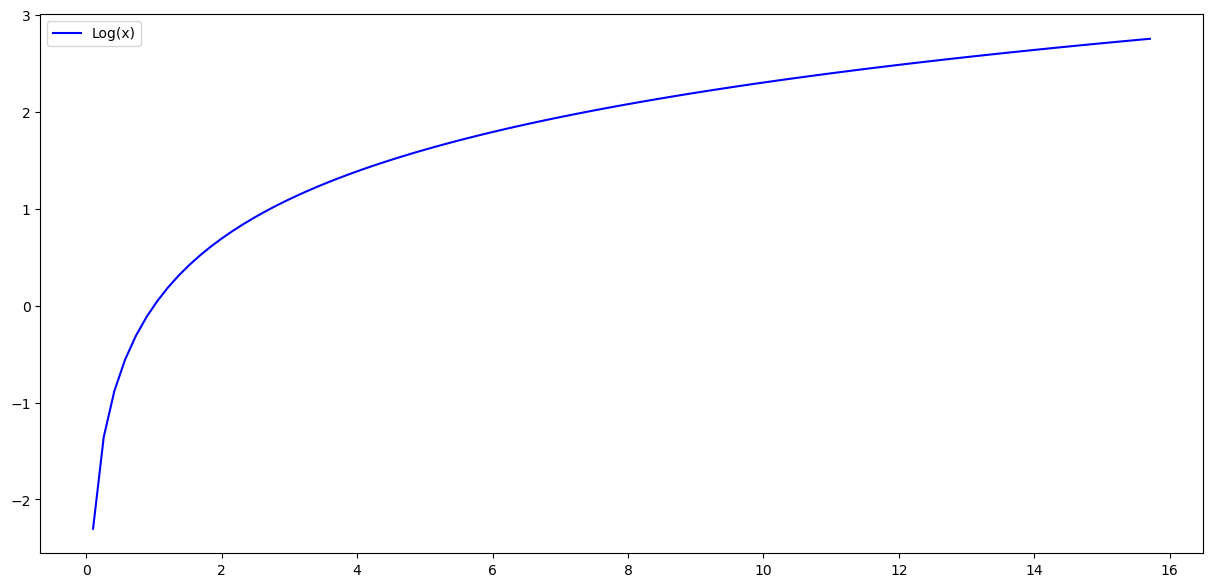

In [55]:
x = np.linspace(0.1, 5*np.pi, 100)

log_values = np.log(x)

plt.figure(figsize=(15, 7))
plt.plot(x, log_values, 'b', label='Log(x)')
plt.legend(loc='best')
plt.show()

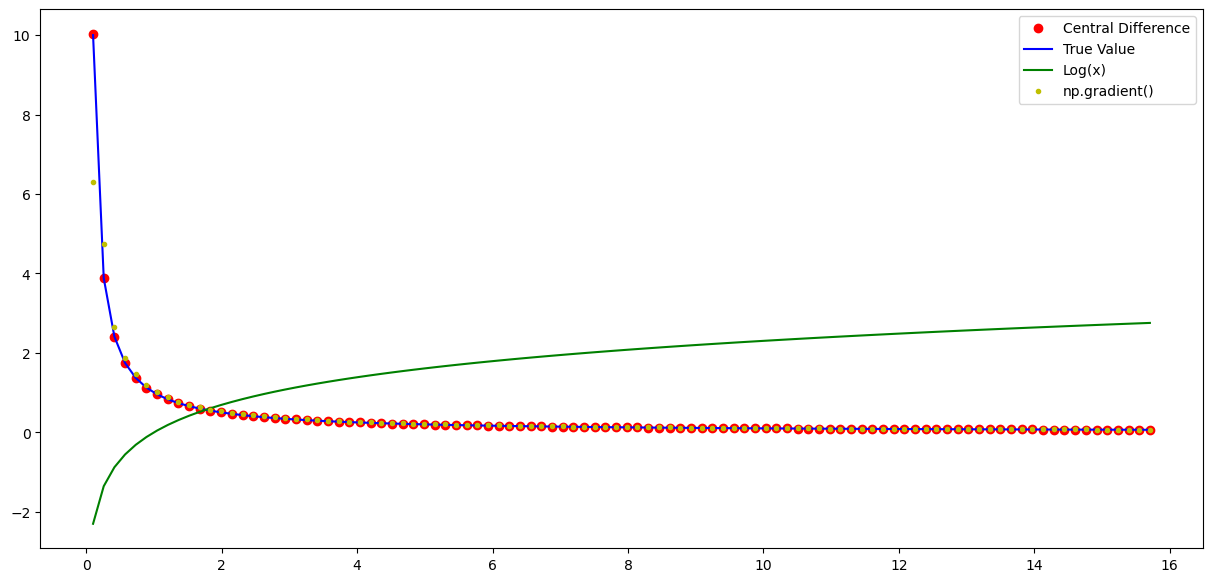

In [56]:
x = np.linspace(0.1, 5*np.pi, 100)

numerical = numerical_derivative(np.log, x)
by_rule = 1 / x

numpy_gradient = np.gradient(np.log(x), 0.15)

plt.figure(figsize=(15, 7))
plt.plot(x, numerical, 'r.', label='Central Difference', markersize=12)
plt.plot(x, by_rule, 'b', label='True Value')
plt.plot(x, np.log(x), 'g', label='Log(x)')
plt.plot(x, numpy_gradient, 'y.', label='np.gradient()')
plt.legend(loc='best')
plt.show()

In [57]:
x

array([ 0.1       ,  0.25765619,  0.41531239,  0.57296858,  0.73062478,
        0.88828097,  1.04593717,  1.20359336,  1.36124956,  1.51890575,
        1.67656195,  1.83421814,  1.99187434,  2.14953053,  2.30718672,
        2.46484292,  2.62249911,  2.78015531,  2.9378115 ,  3.0954677 ,
        3.25312389,  3.41078009,  3.56843628,  3.72609248,  3.88374867,
        4.04140487,  4.19906106,  4.35671725,  4.51437345,  4.67202964,
        4.82968584,  4.98734203,  5.14499823,  5.30265442,  5.46031062,
        5.61796681,  5.77562301,  5.9332792 ,  6.0909354 ,  6.24859159,
        6.40624779,  6.56390398,  6.72156017,  6.87921637,  7.03687256,
        7.19452876,  7.35218495,  7.50984115,  7.66749734,  7.82515354,
        7.98280973,  8.14046593,  8.29812212,  8.45577832,  8.61343451,
        8.7710907 ,  8.9287469 ,  9.08640309,  9.24405929,  9.40171548,
        9.55937168,  9.71702787,  9.87468407, 10.03234026, 10.18999646,
       10.34765265, 10.50530885, 10.66296504, 10.82062123, 10.97

In [58]:
list(range(100))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

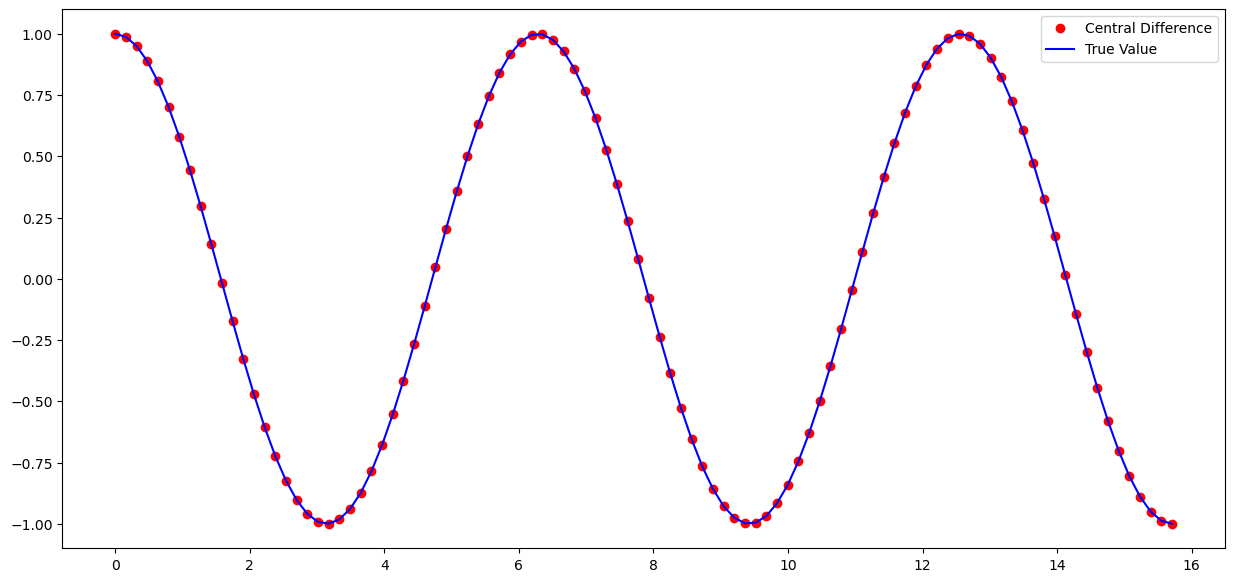

In [59]:
x = np.linspace(0, 5*np.pi, 100)
numerical = numerical_derivative(np.sin, x)
by_rule = np.cos(x)

plt.figure(figsize=(15, 7))
plt.plot(x, numerical, 'r.', label='Central Difference', markersize=12)
plt.plot(x, by_rule, 'b', label='True Value')
plt.legend(loc='best')
plt.show()

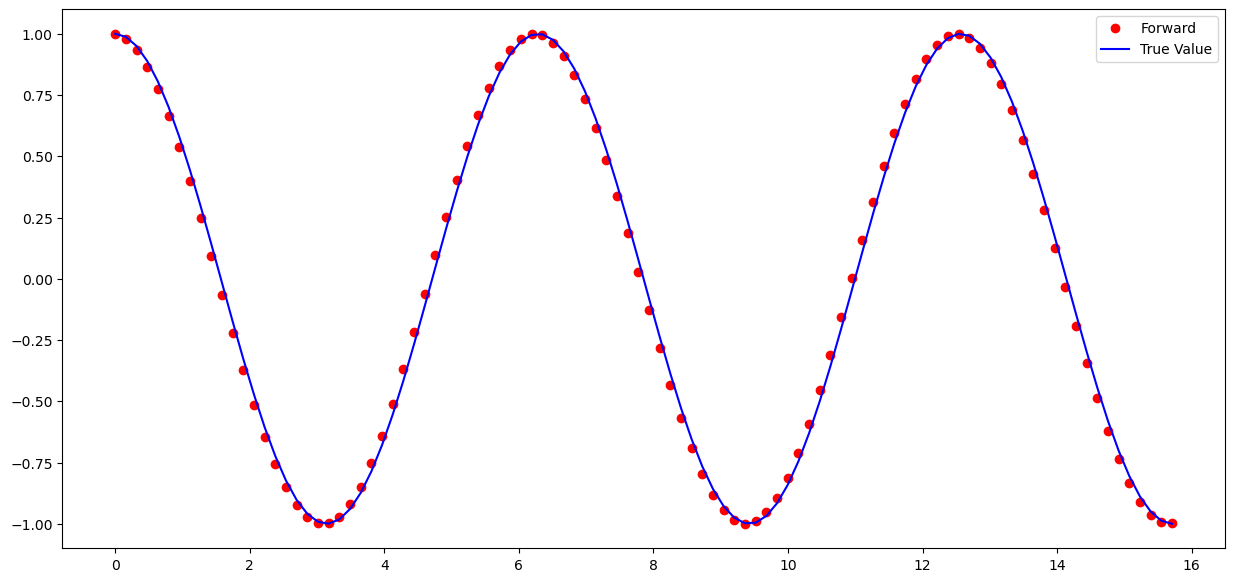

In [60]:
x = np.linspace(0, 5*np.pi, 100)
numerical = numerical_derivative(np.sin, x, method='forward', h=0.1)
by_rule = np.cos(x)

plt.figure(figsize=(15, 7))
plt.plot(x, numerical, 'r.', label='Forward', markersize=12)
plt.plot(x, by_rule, 'b', label='True Value')
plt.legend(loc='best')
plt.show()

---
# Gradient

In [61]:


x = [1, 2, 3, 4, 5, 6]

y = np.array([1, 2, 4, 7, 11, 16])

In [62]:
j = np.gradient(y)
j

array([1. , 1.5, 2.5, 3.5, 4.5, 5. ])

Gradient is defined as (change in y)/(change in x).

**x**, here, is the list index, so the difference between adjacent values is 1.

At the boundaries, the first difference is calculated. This means that at each end of the array, the gradient given is simply, the difference between the end two values (divided by 1).

Away from the boundaries the gradient for a particular index is given by taking the difference between the the values either side and dividing by 2.

So, the gradient of y, above, is calculated thus:
```python
j[0] = (y[1]-y[0])/1 = (2-1)/1  = 1
j[1] = (y[2]-y[0])/2 = (4-1)/2  = 1.5
j[2] = (y[3]-y[1])/2 = (7-2)/2  = 2.5
j[3] = (y[4]-y[2])/2 = (11-4)/2 = 3.5
j[4] = (y[5]-y[3])/2 = (16-7)/2 = 4.5
j[5] = (y[5]-y[4])/1 = (16-11)/1 = 5
```


In [63]:
A = np.array([[1, 2, 6], [3, 4, 5], [3, 4, 5]])

In [64]:
np.gradient(A)

[array([[ 2. ,  2. , -1. ],
        [ 1. ,  1. , -0.5],
        [ 0. ,  0. ,  0. ]]),
 array([[1. , 2.5, 4. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]])]

In [65]:
np.gradient(A, axis=0)

array([[ 2. ,  2. , -1. ],
       [ 1. ,  1. , -0.5],
       [ 0. ,  0. ,  0. ]])

In [66]:
np.gradient(A, axis=1)

array([[1. , 2.5, 4. ],
       [1. , 1. , 1. ],
       [1. , 1. , 1. ]])

### Gradient Visualization

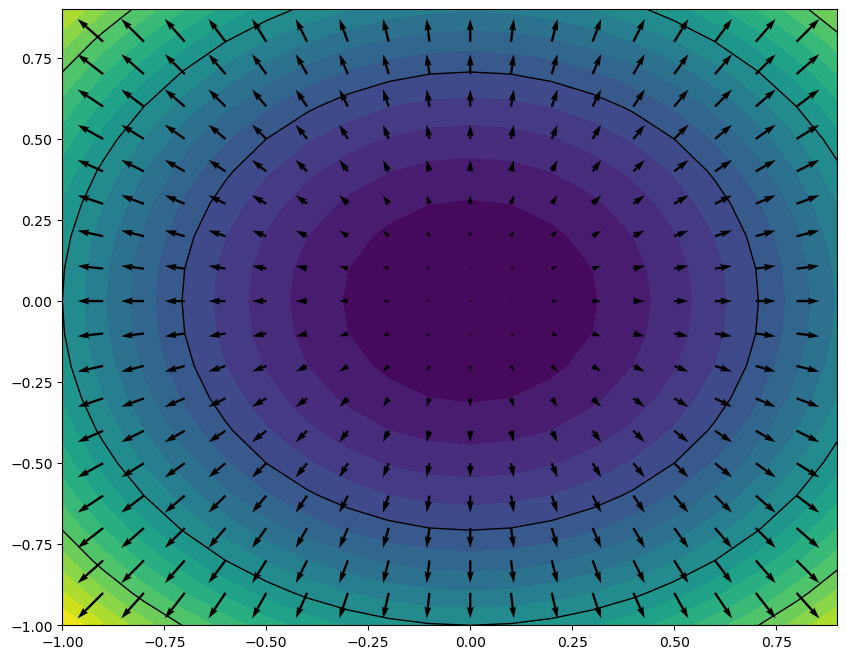

In [67]:
x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = X**2 + Y**2

gradx, grady = np.gradient(Z)

n = 20
l = np.array([0.0, 0.5, 1.0, 1.5, 2.0])

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, n)
plt.contour(X, Y, Z, levels=l, colors='k', linewidths=1, linestyles='solid')
plt.quiver(X, Y, gradx, grady);

In [68]:
X.shape

(20, 20)

In [70]:
%matplotlib notebook

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.quiver(X, Y, np.zeros(len(Z)), gradx, grady, np.zeros(len(Z)), color='k');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


<IPython.core.display.Javascript object>

Text(0.5, 0, 'z')